In [38]:
#import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [39]:
#load the dataset from keras datasets
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [42]:
#get the shape of the data
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


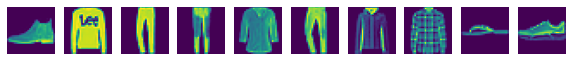

Labels: [9 2 1 1 6 1 4 6 5 7]


In [45]:
#plot the data
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(testX[i]) 
    plt.axis('off')
plt.show()
print('Labels: %s' % (testY[0:10]))

In [46]:
#normalize the data array
trainX=trainX.astype('float32')
testX=testX.astype('float32')
trainX/=255
testX/=255



In [47]:
#reshape the features and convert the target columns into categorical values

trainX = trainX.reshape(trainX.shape[0], 28, 28, 1).astype('float32')
testX = testX.reshape(testX.shape[0], 28, 28, 1).astype('float32')

trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [60]:
#build a convolutional model 

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))


model.add(Flatten())

model.add(Dense(128))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))



In [61]:
#prints the model summary for each layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 9, 9, 32)          320       
_________________________________________________________________
activation_10 (Activation)   (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_11 (Activation)   (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 32)          9248      
_________________________________________________________________
activation_12 (Activation)   (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

In [56]:
#compile the model by passing loss function, optimizer and the evaluation metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#train the model for 10 epochs and validate on test data
history=model.fit(trainX, trainY, batch_size=32,epochs=10,validation_data=(testX, testY))

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5511 - accuracy: 0.7965 - val_loss: 0.4336 - val_accuracy: 0.8409
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4687 - accuracy: 0.8292 - val_loss: 0.4171 - val_accuracy: 0.8446
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4352 - accuracy: 0.8382 - val_loss: 0.3762 - val_accuracy: 0.8641
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4117 - accuracy: 0.8471 - val_loss: 0.3902 - val_accuracy: 0.8534
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3976 - accuracy: 0.8541 - val_loss: 0.3668 - val_accuracy: 0.8659
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3888 - accuracy: 0.8561 - val_loss: 0.3751 - val_accuracy: 0.8637
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3803 - accuracy: 0.8590 - val_loss: 0.3415 - val_ac

Text(0.5, 1.0, 'Accuracy curve')

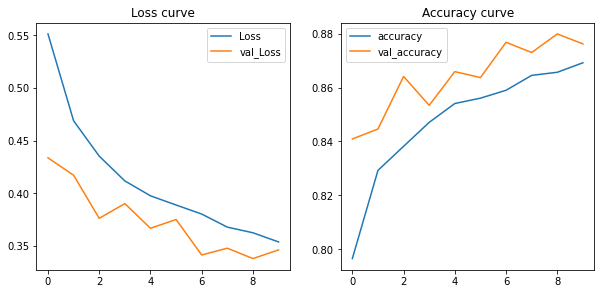

In [57]:
#plot the loss and accuracy graphs
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss curve')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy curve')

In [59]:
#make model predictions
predicted_classes = model.predict_classes(testX)
print("predicted:",predicted_classes[1:10])
print("actual:",testY[1:10])

predicted: [2 1 1 6 1 4 6 5 7]
actual: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [72]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [92]:
pred = model.predict(testX)
pred_classes = np.argmax(pred,axis = 1) 
real_y = np.argmax(testY,axis = 1) 

In [93]:
correct = []
for i in range(len(testY)):
    if(pred_classes[i] == real_y[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Sneaker\nActual Label : Sneaker')

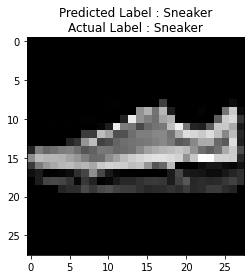

In [98]:
plt.imshow(testX[correct[1]].reshape(28,28), cmap='gray')
plt.title("Predicted Label : " + str(clothing[pred_classes[correct[1]]]) + "\n"+"Actual Label : " + str(clothing[real_y[correct[1]]]))